## Import Libraries and Data

In [12]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_10-14-03-23.csv', firstRow=150, lastRow=156)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_100323_S151-156.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)

## Analyse Water Addition

In [13]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=80s and ended at t=494s; mass=44.8178g
This equals a volume of 44.908m; expected was 45.146mL; error is 0.528%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.001 g/s and for 2nd derivative = 0.00020833333333333337 g/s^2


<IPython.core.display.Javascript object>


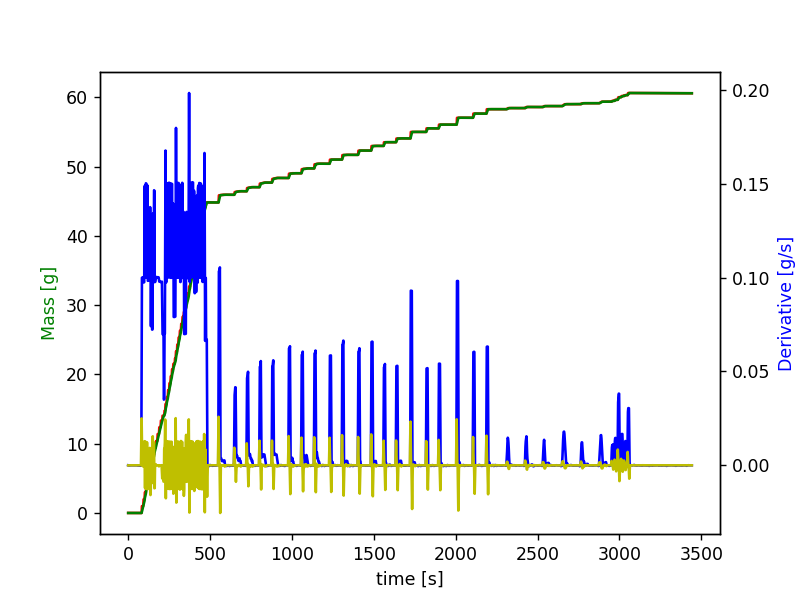

Addition of 1.12g Plantapon ACG 50 detected from 548s to 596s - expected volume = 0.969mL and actual volume = 0.998mL (resulting error is 3.045%)
Addition of 0.509g Plantacare 818 detected from 644s to 694s - expected volume = 0.528mL and actual volume = 0.468mL (resulting error is 11.409%)
Addition of 0.59g Plantacare 818 detected from 720s to 766s - expected volume = 0.528mL and actual volume = 0.542mL (resulting error is 2.626%)
Addition of 0.668g Plantacare 818 detected from 798s to 846s - expected volume = 0.556mL and actual volume = 0.616mL (resulting error is 10.805%)
Addition of 0.672g Plantacare 818 detected from 874s to 920s - expected volume = 0.556mL and actual volume = 0.62mL (resulting error is 11.502%)
Addition of 0.682g Plantacare 2000 detected from 976s to 1016s - expected volume = 0.755mL and actual volume = 0.63mL (resulting error is 16.577%)
Addition of 0.701g Plantacare 2000 detected from 1054s to 1104s - expected volume = 0.599mL and actual volume = 0.648mL (resul

In [14]:
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.00125 g/s and for 2nd derivative = 0.00025 g/s^2


<IPython.core.display.Javascript object>


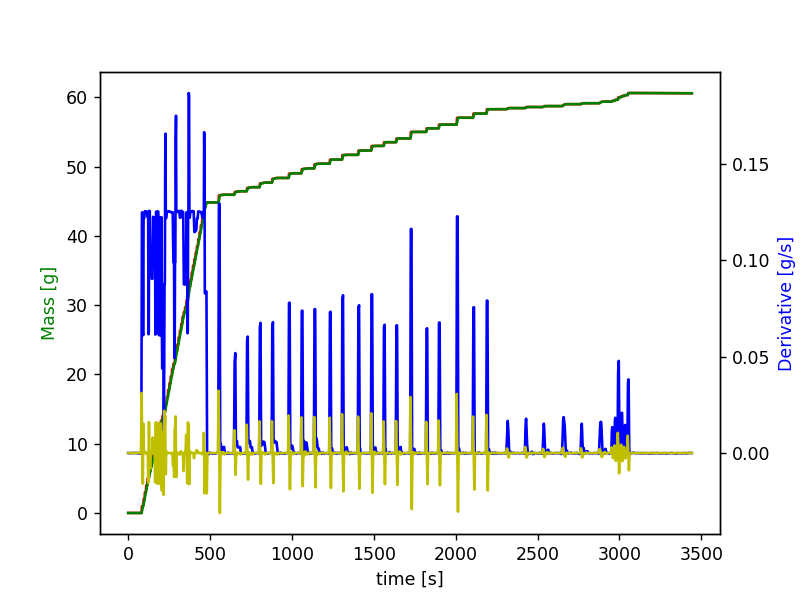

Addition of 0.16g Luviquat Excellence detected from 2306s to 2332s - expected volume = 0.176mL and actual volume = 0.146mL (resulting error is 16.927%)
Addition of 0.161g Luviquat Excellence detected from 2420s to 2446s - expected volume = 0.149mL and actual volume = 0.146mL (resulting error is 1.829%)
Addition of 0.136g Luviquat Excellence detected from 2468s to 2574s - expected volume = 0.127mL and actual volume = 0.124mL (resulting error is 2.946%)
Addition of 0.279g Luviquat Excellence detected from 2646s to 2686s - expected volume = 0.257mL and actual volume = 0.255mL (resulting error is 0.887%)
Addition of 0.141g Luviquat Excellence detected from 2760s to 2790s - expected volume = 0.116mL and actual volume = 0.127mL (resulting error is 9.205%)
Addition of 0.235g Luviquat Excellence detected from 2872s to 2922s - expected volume = 0.216mL and actual volume = 0.214mL (resulting error is 0.844%)


In [15]:
# default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=5, mergeSens=6, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.001 g/s^2


<IPython.core.display.Javascript object>


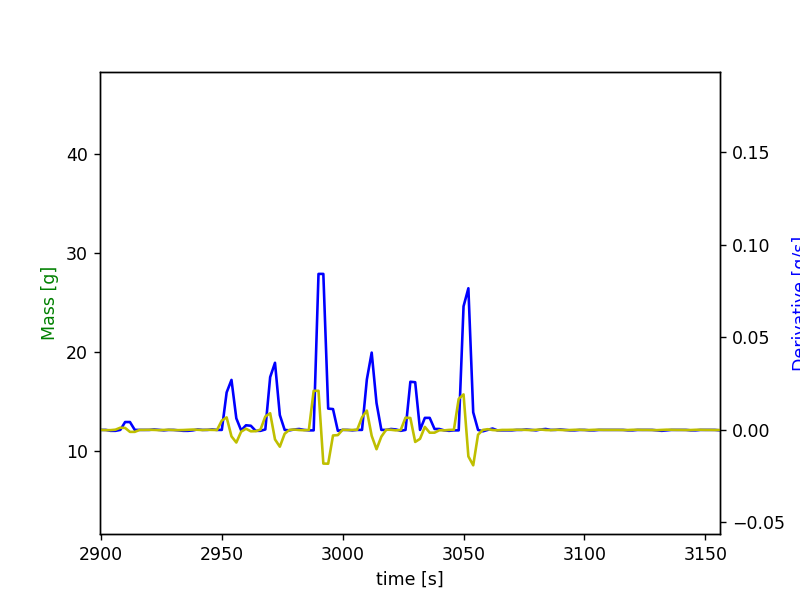

Addition of 0.112g Arlypon TT detected from 2948s to 2960s - expected volume = 0.109mL and actual volume = 0.118mL (resulting error is 8.738%)
Addition of 0.144g Arlypon TT detected from 2966s to 2980s - expected volume = 0.135mL and actual volume = 0.151mL (resulting error is 11.628%)
Addition of 0.38g Arlypon TT detected from 2986s to 3002s - expected volume = 0.415mL and actual volume = 0.399mL (resulting error is 3.671%)
Addition of 0.168g Arlypon TT detected from 3006s to 3020s - expected volume = 0.108mL and actual volume = 0.176mL (resulting error is 62.621%)
Addition of 0.13g Arlypon TT detected from 3024s to 3042s - expected volume = 0.11mL and actual volume = 0.136mL (resulting error is 23.113%)
Addition of 0.302g Arlypon TT detected from 3046s to 3060s - expected volume = 0.296mL and actual volume = 0.317mL (resulting error is 7.092%)


In [16]:
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=5, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

## Consolidate results and create output

In [6]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_100323_S151-S156.csv', index=False)
actualMassFractions

C:\Users\ACHI01\AppData\Local\Temp\ipykernel_15628\84026835.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for entry in sampleList[i].addedMassSeries.iteritems():


,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
150,151.0,0.0,10.963092,0.0,0.000000,0.000000,0.000000,12.722903,0.0,0.000000,0.000000,0.000000,0.0,1.561122,0.0,0.0,0.0,0.0,1.096211
151,152.0,0.0,0.000000,0.0,10.893279,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,12.360577,0.0,1.595105,0.0,0.0,0.0,0.0,1.426678
152,153.0,0.0,0.000000,0.0,13.202445,6.726406,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.339318,0.0,0.0,0.0,0.0,3.750582
153,154.0,0.0,0.000000,0.0,0.000000,13.356268,0.000000,10.500411,0.0,0.000000,0.000000,0.000000,0.0,2.695752,0.0,0.0,0.0,0.0,1.615522
154,155.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,9.290810,0.0,10.501756,0.000000,0.000000,0.0,1.386927,0.0,0.0,0.0,0.0,1.284784
155,156.0,0.0,0.000000,0.0,0.000000,0.000000,12.669501,0.000000,0.0,0.000000,9.826833,0.000000,0.0,2.312312,0.0,0.0,0.0,0.0,2.971567
